<a href="https://colab.research.google.com/github/Sheila-Otieno/Data-Science/blob/master/Kmeans__recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
import nltk
import string

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cvtext_cleanVS.xlsx to cvtext_cleanVS.xlsx


In [ ]:
cv_text = pd.read_excel('cvtext_cleanVS.xlsx')
cv_text.head()

In [ ]:
#fucntion to lower text cases and remove punctuations from text
def lower_text(text):
  text = text.lower()
  return (text)

In [ ]:
cv_text['CV'] = cv_text['CV'].apply(lambda x: lower_text(x))
cv_text['CVText'] = cv_text['CVText'].apply(lambda x: lower_text(x))
cv_text['Category'] = cv_text['Category'].apply(lambda x: lower_text(x))

In [ ]:
cv_text.head()

In [ ]:
cv_text = cv_text.replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
from spacy.lang.en.examples import sentences

nlp = spacy.load("en_core_web_sm")

In [ ]:
cvtext = cv_text[['CVText','Category']].copy().astype(str)
cvtext.head()

In [ ]:
##function to lower text and remove special characters
def lowerspecialclean(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
  text = text.lower()
  return text

In [ ]:
normalize_text = np.vectorize(lowerspecialclean)


In [ ]:
cv_text_norm = normalize_text(cv_text['CVText'])
cv_text_norm

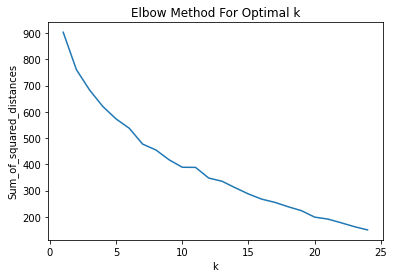

In [ ]:
#check the optimal number of clusters to use
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100)
    km = km.fit(cv_glove_vectors)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in cv_text_norm])
km = KMeans(n_clusters=7, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([cv_text, cluster_labels], axis=1)

,CV,CVText,Category,ClusterLabel
0,cv1,java java developer developer web developer wo...,java developer,0
1,cv2,java developer java developer spring stockholm...,java developer,0
2,cv3,fullstack developer net sql senior fullstack d...,developer,0
3,cv4,service end user end user tools end user commo...,technical project manager,1
4,cv5,project project manager project management dev...,project manager,3
5,cv6,scrum master product owner project manager scr...,project manager scrum master,3
6,cv7,commerce company project manager commerce comp...,program manager,2
7,cv8,project management project manager project veh...,program manager,2
8,cv9,project manager mobile access network technica...,program manager,3
9,cv10,java spring aws python java javascript spring ...,developer,4


In [ ]:
#function to predict clusters for new candidates
def job_cluster(text):
  cv_text_norm = normalize_text(text)
  cv_glove_vectors = np.array([nlp(str(doc)).vector for doc in cv_text_norm])
  jobpredict = model.predict(cv_glove_vectors)
  return jobpredict


In [ ]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in cv_text['CVText']])
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([cv_text, cluster_labels], axis=1)

,CV,CVText,Category,ClusterLabel
0,cv1,java java developer developer web developer wo...,java developer,1
1,cv2,java developer java developer spring stockholm...,java developer,1
2,cv3,fullstack developer net sql senior fullstack d...,developer,1
3,cv4,service end user end user tools end user commo...,technical project manager,0
4,cv5,project project manager project management dev...,project manager,2
5,cv6,scrum master product owner project manager scr...,project manager scrum master,2
6,cv7,commerce company project manager commerce comp...,program manager,0
7,cv8,project management project manager project veh...,program manager,0
8,cv9,project manager mobile access network technica...,program manager,2
9,cv10,java spring aws python java javascript spring ...,developer,1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving linkedin.csv to linkedin.csv


In [ ]:
linked_data = pd.read_csv('linkedin.csv')
linked_data.head()

In [ ]:
test_data = linked_data.loc[linked_data['category'] == "Information Technology" , ['category', 'clean_skills']].head(25)
test_data

,category,clean_skills
153,Information Technology,"['Management', 'Vendor Management', 'Team Mana..."
154,Information Technology,"['Content Development', 'Copy Editing', 'Commu..."
155,Information Technology,"['Public Policy', 'Diplomacy', 'Strategy']"
156,Information Technology,"['IT Management', 'Healthcare Information Tech..."
157,Information Technology,"['Risk Management', 'Fraud', 'Risk Assessment'..."
158,Information Technology,"['Integration', 'Strategy', '.NET', 'Software ..."
159,Information Technology,"['Information Security', 'Strategic Planning',..."
160,Information Technology,"['IT Service Management', 'Network Security', ..."
161,Information Technology,"['Integration', 'Strategy', '.NET', 'Software ..."
162,Information Technology,"['Data Warehousing', 'Database Design', 'PL/SQL']"


In [ ]:
test_norm = normalize_text(list(test_data['clean_skills']))
test_norm

#test_glove_vectors = np.array([nlp(str(doc)).vector for doc in test_norm])

#test_glove_vectors = test_glove_vectors.flatten

job_cluster(test_norm)






array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       2, 0, 2], dtype=int32)